Post hoc tests are an integral part of ANOVA. When you use ANOVA to test the equality of at least three group means, statistically significant results indicate that not all of the group means are equal. 

However, ANOVA results do not identify which particular differences between pairs of means are significant. Use post hoc tests to explore differences between multiple group means while controlling the experiment-wise error rate.

ANOVA F Test or Omnibus test :
Typically, when you want to determine whether three or more means are different, you’ll perform ANOVA. Statisticians refer to the ANOVA F-test as an omnibus test. Welch’s ANOVA is another type of omnibus test.


Using Post Hoc Tests with ANOVA
By Jim Frost 107 Comments

Post hoc tests are an integral part of ANOVA. When you use ANOVA to test the equality of at least three group means, statistically significant results indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant. Use post hoc tests to explore differences between multiple group means while controlling the experiment-wise error rate.

In this post, I’ll show you what post hoc analyses are, the critical benefits they provide, and help you choose the correct one for your study. Additionally, I’ll show why failure to control the experiment-wise error rate will cause you to have severe doubts about your results.

Starting with the ANOVA Omnibus Test
Typically, when you want to determine whether three or more means are different, you’ll perform ANOVA. Statisticians refer to the ANOVA F-test as an omnibus test. Welch’s ANOVA is another type of omnibus test.

An omnibus test provides overall results for your data. Collectively, are the differences between the means statistically significant—Yes or No?

If the p-value from your ANOVA F-test or Welch’s test is less than your significance level, you can reject the null hypothesis.
<ol>
<li>Null: All group means are equal.</li>
<li>Alternative: Not all group means are equal</li>
</ol>

However, ANOVA test results don’t map out which groups are different from other groups. As you can see from the hypotheses above, if you can reject the null, you only know that not all of the means are equal. Sometimes you really need to know which groups are significantly different from other groups!

You can run a test to understand pairwise significance
<ol>

<li>LSD test</li>
<li>Tukey Cramer test</li>
</ol>


Ref: https://statisticsbyjim.com/anova/post-hoc-tests-anova/

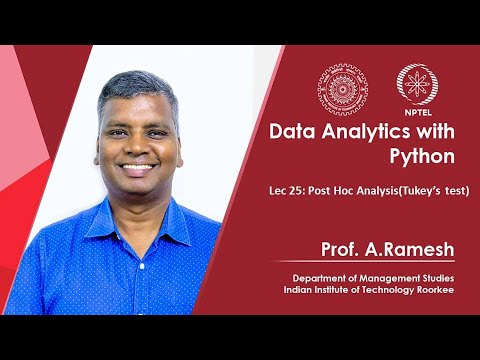

In [40]:
from IPython.display import YouTubeVideo

YouTubeVideo('3C6Ge20LsTQ', width=600, height=300)

In [34]:
import pandas as pd 
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Read the data 
df=pd.read_excel('D:\ERA_ML\IIT Roorkee\Dataset\week_5\Tensile strength of paper.xlsx')
df

#H0 :mu1=mu2=mu3=mu4
#Ha: mu1!=mu2!=mu3!=mu4

,hardwood concentration 5%,hardwood concentration 10%,hardwood concentration 15%,hardwood concentration 20%
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [35]:
# col_names =list(df.columns)
# col_names
new_data = pd.melt(df.reset_index(),id_vars=['index'])
new_data.columns=['index','treatments','value']
new_data

,index,treatments,value
0,0,hardwood concentration 5%,7
1,1,hardwood concentration 5%,8
2,2,hardwood concentration 5%,15
3,3,hardwood concentration 5%,11
4,4,hardwood concentration 5%,9
5,5,hardwood concentration 5%,10
6,0,hardwood concentration 10%,12
7,1,hardwood concentration 10%,17
8,2,hardwood concentration 10%,13
9,3,hardwood concentration 10%,18


In [36]:
mod_1 = ols('value ~C(treatments)',data=new_data).fit()
mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Sat, 07 May 2022   Prob (F-statistic):           3.59e-06
Time:                        06:09:08   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      15.6667      1.041     15.042      0.000      13.494      17.839
C(treatments)[T.hardwood concentration 15%]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(treatments)[T.hardwood concentration 20%]     5.5000      1.473      3.734      0.001       2.428       8.572
C(treatments)[T.hardwood concentration 5%]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
anova_table = sm.stats.anova_lm(mod_1,typ=1)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


In [38]:
# Understanding:
# The more the F value --> lesser the P value --> High chances to reject null hypothesis
# We reject null hypothesis since P < aplha 
#dir(mod_1)
f_val_from_test = mod_1.fvalue
p_val_from_test = mod_1.f_pvalue
alpha = 0.05
if p_val_from_test<=alpha:
    print('Reject Null hypothesis')
else:
    print('Fail to reject null hypothesis')


Reject Null hypothesis


Ref Tukey Cramer test: https://www.statology.org/tukey-test-python/

In [39]:
# We Reject Null hypothesis 
# that doesn't mean all means are unequal
# Either any to pairs may be equal
# Lets test using Tukey cramer test 

from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=new_data['value'],
                          groups=new_data['treatments'],
                          alpha=0.05)

#display results
print(tukey)

                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                     group2           meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------------
hardwood concentration 10% hardwood concentration 15%   1.3333 0.8022  -2.7892  5.4559  False
hardwood concentration 10% hardwood concentration 20%      5.5 0.0066   1.3774  9.6226   True
hardwood concentration 10%  hardwood concentration 5%  -5.6667 0.0051  -9.7892 -1.5441   True
hardwood concentration 15% hardwood concentration 20%   4.1667  0.047   0.0441  8.2892   True
hardwood concentration 15%  hardwood concentration 5%     -7.0 0.0007 -11.1226 -2.8774   True
hardwood concentration 20%  hardwood concentration 5% -11.1667    0.0 -15.2892 -7.0441   True
---------------------------------------------------------------------------------------------


Hence we conclude that 10% hardwood concentration and 15% hardwood concentration has the same mean 

mu2=mu3  at significance level of 0.05 (aplha)

All other means are not equal at significance level of 0.05 (aplha)

mu1!=mu2

mu1!=mu3

mu1!=mu4

mu2!=mu4

mu3!=mu4